In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import os
import scipy.stats
from scipy.stats import t, norm
import seaborn as sns
currentPath = os.getcwd()
os.chdir('/Users/kimfr/OneDrive - unist.ac.kr/Optimization/Stochastic_financial_planning/Mark_port_cvxpy/data')

In [31]:
stock =pd.read_excel('kospi_30.xlsx')
bond = pd.read_excel('국채3년.xlsx')

In [32]:
stock

,Date,005930,000660,005935,035420,005380,012330,068270,051910,055550,...,096770,033780,035720,003550,036570,066570,000810,090430,086790,010950
0,2016-11-03,0.0000,0.0403,0.0268,0.0316,-0.0035,0.0000,-0.0206,-0.0133,0.0303,...,0.0342,0.0047,-0.0179,0.0321,-0.0090,0.0164,-0.0052,-0.0036,0.0243,-0.0168
1,2016-11-04,0.0080,0.0018,0.0752,0.0000,-0.0244,-0.0042,0.0184,-0.0045,-0.0106,...,-0.0041,-0.0047,-0.0043,0.0311,-0.0227,0.0000,-0.0052,0.0000,0.0055,0.0000
2,2016-11-05,-0.0224,-0.0351,0.0010,-0.0051,-0.0179,0.0106,0.0009,-0.0105,-0.0048,...,0.0373,-0.0140,0.0148,0.0067,0.0209,-0.0072,-0.0157,-0.0218,-0.0145,0.0249
3,2016-11-06,-0.0163,0.0237,0.0000,-0.0103,-0.0073,0.0168,-0.0300,0.0000,0.0120,...,-0.0080,0.0000,0.0292,-0.0150,-0.0136,0.0270,-0.0035,0.0372,0.0203,0.0397
4,2016-11-07,0.0090,0.0000,-0.0051,-0.0052,0.0000,0.0083,0.0018,0.0396,0.0083,...,0.0081,0.0000,-0.0075,-0.0085,0.0138,-0.0053,-0.0374,0.0179,0.0090,-0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2019-10-28,0.0079,0.0000,-0.0012,0.0295,-0.0162,0.0000,0.0203,0.0017,0.0023,...,-0.0062,-0.0192,0.0000,0.0058,-0.0191,0.0088,-0.0067,-0.0096,-0.0424,-0.0189
1090,2019-10-29,-0.0039,0.0012,-0.0097,-0.0255,0.0082,0.0021,0.0224,-0.0066,0.0080,...,0.0093,-0.0049,-0.0036,0.0043,0.0000,0.0029,0.0000,0.0354,0.0177,-0.0192
1091,2019-10-30,-0.0137,-0.0181,0.0024,0.0098,0.0000,0.0021,-0.0073,0.0167,-0.0193,...,-0.0215,0.0000,-0.0108,-0.0058,0.0117,-0.0072,-0.0136,0.1429,-0.0189,-0.0049
1092,2019-10-31,0.0000,0.0061,-0.0012,0.0615,-0.0041,0.0000,-0.0196,0.0082,-0.0151,...,0.0063,-0.0148,0.0254,0.0043,-0.0058,-0.0234,-0.0069,0.0435,-0.0030,-0.0177


In [33]:
stock.columns

Index(['Date', '005930', '000660', '005935', '035420', '005380', '012330',
       '068270', '051910', '055550', '017670', '051900', '105560', '028260',
       '005490', '034730', '015760', '000270', '006400', '018260', '032830',
       '096770', '033780', '035720', '003550', '036570', '066570', '000810',
       '090430', '086790', '010950'],
      dtype='object')

In [34]:
index = stock.columns
ret = stock
index = index.drop(labels=['Date'])

In [35]:
index

Index(['005930', '000660', '005935', '035420', '005380', '012330', '068270',
       '051910', '055550', '017670', '051900', '105560', '028260', '005490',
       '034730', '015760', '000270', '006400', '018260', '032830', '096770',
       '033780', '035720', '003550', '036570', '066570', '000810', '090430',
       '086790', '010950'],
      dtype='object')

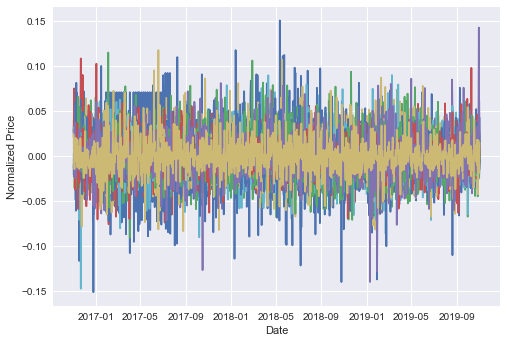

In [36]:
x= pd.date_range('2016-11-03',periods=1094)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
for i in range(0,29):
    plt.plot(x,stock.iloc[:,i+1])
plt.show()

 Markowitz portfolio optimization 사용

In [6]:
mu = ret.mean()
sigma = stock.cov()
#set number of runs of random portfolio weights
num_portfolios = 25000

In [14]:
results =  np.zeros((30+3 ,num_portfolios))

In [15]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(30))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mu * weights) * 1192
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(sigma, weights))) * np.sqrt(1192)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+2,i] = weights[j]

In [16]:
results[0,:]

array([0.32487397, 0.27134848, 0.3011149 , ..., 0.23311027, 0.38582332,
       0.37252416])

In [17]:
index

Index(['005930', '000660', '005935', '035420', '005380', '012330', '068270',
       '051910', '055550', '017670', '051900', '105560', '028260', '005490',
       '034730', '015760', '000270', '006400', '018260', '032830', '096770',
       '033780', '035720', '003550', '036570', '066570', '000810', '090430',
       '086790', '010950'],
      dtype='object')

In [18]:
col=['ret','stdev','sharpe']
for i in range(0,30):
    col.append(index[i])

In [19]:
results_frame = pd.DataFrame(results.T, columns = col)

In [20]:
results_frame

,ret,stdev,sharpe,005930,000660,005935,035420,005380,012330,068270,...,096770,033780,035720,003550,036570,066570,000810,090430,086790,010950
0,0.324874,0.123886,0.061867,0.019801,0.042846,0.012974,0.000278,0.056622,0.009440,0.036675,...,0.032770,0.022155,0.061939,0.042035,0.019860,0.033414,0.003794,0.023148,0.058021,0.0
1,0.271348,0.134045,0.010262,0.051428,0.023291,0.041497,0.022384,0.051220,0.000723,0.017739,...,0.019858,0.028886,0.033002,0.013351,0.046393,0.053349,0.052909,0.048671,0.032810,0.0
2,0.301115,0.129219,0.055395,0.035678,0.009562,0.031999,0.043511,0.046492,0.023015,0.033842,...,0.015898,0.018492,0.003499,0.035458,0.057621,0.020957,0.022312,0.007107,0.037263,0.0
3,0.406410,0.145096,0.039870,0.064262,0.051697,0.000832,0.011656,0.041540,0.058013,0.009766,...,0.041489,0.052000,0.053715,0.020531,0.034508,0.045817,0.049801,0.002524,0.001343,0.0
4,0.372072,0.154954,0.012224,0.058824,0.012478,0.042802,0.001965,0.077375,0.060581,0.040798,...,0.000764,0.051822,0.019368,0.058664,0.013191,0.027462,0.048908,0.012730,0.064347,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.317934,0.138092,0.011520,0.028746,0.044904,0.039649,0.052266,0.025660,0.026166,0.057214,...,0.022808,0.057459,0.029309,0.001259,0.005418,0.008898,0.008486,0.031765,0.045278,0.0
24996,0.183851,0.144700,0.030953,0.017649,0.031237,0.057392,0.052050,0.051936,0.024228,0.050061,...,0.046223,0.057279,0.001708,0.003286,0.052301,0.037696,0.035998,0.014846,0.012117,0.0
24997,0.233110,0.139969,0.002051,0.037213,0.009522,0.018335,0.038045,0.039119,0.042650,0.041869,...,0.009069,0.054490,0.042882,0.012795,0.050815,0.036035,0.064421,0.004446,0.058338,0.0
24998,0.385823,0.147990,0.020367,0.039171,0.048477,0.005939,0.054685,0.001109,0.063340,0.004468,...,0.008969,0.035846,0.063534,0.004761,0.016449,0.015478,0.063023,0.045238,0.032553,0.0


In [21]:
results_frame.to_excel("portfolio_generation_30.xlsx")

In [22]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

In [23]:
print(min_vol_port)

ret       0.320217
stdev     0.119081
sharpe    0.029399
005930    0.035560
000660    0.033358
005935    0.012087
035420    0.041369
005380    0.039202
012330    0.014612
068270    0.045964
051910    0.044033
055550    0.049679
017670    0.024423
051900    0.010622
105560    0.020711
028260    0.023059
005490    0.053648
034730    0.050220
015760    0.056377
000270    0.042974
006400    0.015050
018260    0.029408
032830    0.030678
096770    0.029720
033780    0.021062
035720    0.058265
003550    0.043322
036570    0.020085
066570    0.023259
000810    0.022502
090430    0.047282
086790    0.032071
010950    0.000000
Name: 6267, dtype: float64


Text(0, 0.5, 'Returns')

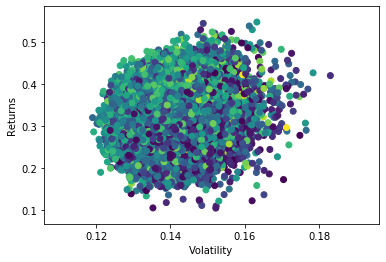

In [24]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe)
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [26]:
print("optimal portfolio in market has return" , min_vol_port[0] , "volatility" , min_vol_port[1], "for 3 years")

optimal portfolio in market has return 0.3202170851054291 volatility 0.11908054643359241 for 3 years


In [27]:
best = results_frame[results_frame['ret']== min_vol_port[0]].index.tolist()
best[0]

6267

In [28]:
del stock['Date']
stock

,005930,000660,005935,035420,005380,012330,068270,051910,055550,017670,...,096770,033780,035720,003550,036570,066570,000810,090430,086790,010950
0,0.0000,0.0403,0.0268,0.0316,-0.0035,0.0000,-0.0206,-0.0133,0.0303,-0.0060,...,0.0342,0.0047,-0.0179,0.0321,-0.0090,0.0164,-0.0052,-0.0036,0.0243,-0.0168
1,0.0080,0.0018,0.0752,0.0000,-0.0244,-0.0042,0.0184,-0.0045,-0.0106,0.0000,...,-0.0041,-0.0047,-0.0043,0.0311,-0.0227,0.0000,-0.0052,0.0000,0.0055,0.0000
2,-0.0224,-0.0351,0.0010,-0.0051,-0.0179,0.0106,0.0009,-0.0105,-0.0048,0.0160,...,0.0373,-0.0140,0.0148,0.0067,0.0209,-0.0072,-0.0157,-0.0218,-0.0145,0.0249
3,-0.0163,0.0237,0.0000,-0.0103,-0.0073,0.0168,-0.0300,0.0000,0.0120,-0.0079,...,-0.0080,0.0000,0.0292,-0.0150,-0.0136,0.0270,-0.0035,0.0372,0.0203,0.0397
4,0.0090,0.0000,-0.0051,-0.0052,0.0000,0.0083,0.0018,0.0396,0.0083,-0.0119,...,0.0081,0.0000,-0.0075,-0.0085,0.0138,-0.0053,-0.0374,0.0179,0.0090,-0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.0079,0.0000,-0.0012,0.0295,-0.0162,0.0000,0.0203,0.0017,0.0023,0.0064,...,-0.0062,-0.0192,0.0000,0.0058,-0.0191,0.0088,-0.0067,-0.0096,-0.0424,-0.0189
1090,-0.0039,0.0012,-0.0097,-0.0255,0.0082,0.0021,0.0224,-0.0066,0.0080,-0.0084,...,0.0093,-0.0049,-0.0036,0.0043,0.0000,0.0029,0.0000,0.0354,0.0177,-0.0192
1091,-0.0137,-0.0181,0.0024,0.0098,0.0000,0.0021,-0.0073,0.0167,-0.0193,-0.0043,...,-0.0215,0.0000,-0.0108,-0.0058,0.0117,-0.0072,-0.0136,0.1429,-0.0189,-0.0049
1092,0.0000,0.0061,-0.0012,0.0615,-0.0041,0.0000,-0.0196,0.0082,-0.0151,0.0128,...,0.0063,-0.0148,0.0254,0.0043,-0.0058,-0.0234,-0.0069,0.0435,-0.0030,-0.0177


In [29]:
port = np.zeros(30)
for i in range(0,30):
    port[i]=min_vol_port.iloc[i+3]
port

array([0.0355599 , 0.03335763, 0.01208714, 0.04136908, 0.03920228,
       0.01461161, 0.0459639 , 0.04403259, 0.04967873, 0.02442349,
       0.01062212, 0.02071059, 0.02305891, 0.05364769, 0.05022024,
       0.05637697, 0.0429739 , 0.01505008, 0.02940833, 0.03067821,
       0.0297199 , 0.02106192, 0.05826475, 0.04332176, 0.02008537,
       0.02325874, 0.02250187, 0.04728201, 0.03207137, 0.        ])

In [30]:
equity_fund = np.dot(stock,port)
print(equity_fund)

[ 0.00484637  0.00243417 -0.0068013  ...  0.00337699  0.00412613
  0.01032399]


In [31]:
equity = pd.DataFrame(equity_fund, columns = ['equity_fund'])
equity

,equity_fund
0,0.004846
1,0.002434
2,-0.006801
3,0.004324
4,-0.000043
...,...
1089,0.000228
1090,0.004260
1091,0.003377
1092,0.004126


In [32]:
bond

,date,yield
0,2014/12/31,0.02095
1,2015/01/02,0.02135
2,2015/01/05,0.02115
3,2015/01/06,0.02080
4,2015/01/07,0.02077
...,...,...
1089,2019/06/04,0.01570
1090,2019/06/05,0.01540
1091,2019/06/07,0.01530
1092,2019/06/10,0.01530


In [33]:
equity

,equity_fund
0,0.004846
1,0.002434
2,-0.006801
3,0.004324
4,-0.000043
...,...
1089,0.000228
1090,0.004260
1091,0.003377
1092,0.004126


In [35]:
df_logret = pd.DataFrame({'stock':equity['equity_fund'], 'bond':bond['yield'] })
df_logret

,stock,bond
0,0.004846,0.02095
1,0.002434,0.02135
2,-0.006801,0.02115
3,0.004324,0.02080
4,-0.000043,0.02077
...,...,...
1089,0.000228,0.01570
1090,0.004260,0.01540
1091,0.003377,0.01530
1092,0.004126,0.01530


In [36]:
df_logret.iloc[:,1]=df_logret.iloc[:,1]/252
mu = df_logret.mean()*252
print(mu)

stock    0.052288
bond     0.017789
dtype: float64


In [37]:
sigma = df_logret.cov()*252
sigma = sigma.values
print("mean of portfolio is", mu)
print("cov of portfolio is", sigma)

mean of portfolio is stock    0.052288
bond     0.017789
dtype: float64
cov of portfolio is [[ 3.82757126e-03 -1.18274743e-06]
 [-1.18274743e-06  2.81225309e-08]]


In [38]:
num_samples = 5000
bond, stock = np.random.multivariate_normal(mu, sigma, num_samples).T

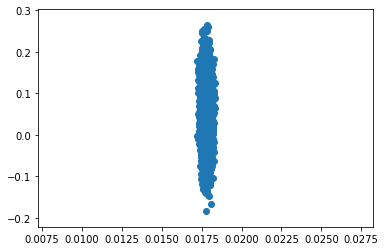

In [39]:
plt.scatter(stock, bond)

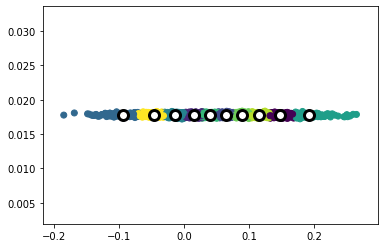

In [40]:
from sklearn.cluster import KMeans

num_clusters =10
kmeans = KMeans(n_clusters = num_clusters).fit(np.transpose([bond,stock]))

plt.scatter(bond, stock, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,
           color='white', edgecolor = 'black', linewidth=3)

In [41]:
print("Scenario probabilities\n")
p=np.zeros(num_clusters)
for i in range(num_clusters):
    p[i] = np.count_nonzero(kmeans.labels_== i)/num_samples
    print("cluster " +str(i)+": {:6.2%}".format(p[i],1))

Scenario probabilities

cluster 0:  6.68%
cluster 1: 13.16%
cluster 2: 15.86%
cluster 3:  2.96%
cluster 4: 11.96%
cluster 5:  3.06%
cluster 6: 15.60%
cluster 7: 13.50%
cluster 8: 10.22%
cluster 9:  7.00%


In [42]:
scenarios = 1 + kmeans.cluster_centers_
scenarios

array([[1.14740056, 1.01774808],
       [1.01528359, 1.01779923],
       [1.06440699, 1.01778922],
       [0.90653605, 1.01781443],
       [0.98704676, 1.01779979],
       [1.19257383, 1.01774309],
       [1.03997289, 1.01780211],
       [1.08914885, 1.01778921],
       [1.11553479, 1.01777629],
       [0.95389052, 1.01781737]])

In [43]:
import cvxpy as cp

x_0 = cp.Variable(2)
y = cp.Variable(num_clusters)
w = cp.Variable(num_clusters)
q=1 ;r=10
initial_amount = 100
goal_amount = 104

In [44]:
goal= cp.Maximize(p.T * (q*y - r*w))
prob= cp.Problem(goal,[sum(x_0) == initial_amount, scenarios * x_0 - y + w 
                      ==goal_amount * np.ones(num_clusters),x_0>=0, y>=0, w>=0])

In [45]:
prob.solve(solver = cp.ECOS)

-14.353946487016671

In [46]:
print("optiman asset allocation is stock: " ,x_0.value[0], "   bond :" ,x_0.value[1])

optiman asset allocation is stock:  47.64444903199438    bond : 52.35555096800562


In [47]:
print("optimal allocation: " +  "{:2.2f}".format(x_0.value[0]) + ", " 
     + "{:2.2f}".format(x_0.value[1]))
print("expected return: "+"{:.2%}".format((goal_amount + np.dot(p, y.value-w.value))/initial_amount-1,1))

optimal allocation: 47.64, 52.36
expected return: 3.34%


Text(0, 0.5, 'final wealth')

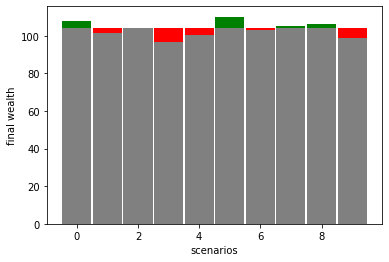

In [48]:
fig, ax = plt.subplots(1,1)
ax.bar(range(num_clusters), np.round(goal_amount+y.value,2),color='green',width=0.95)
ax.bar(range(num_clusters), goal_amount, color='red', width =0.95)
ax.bar(range(num_clusters), np.round(goal_amount-w.value,2),color ='grey',width =0.95)
ax.set_xlabel('scenarios')
ax.set_ylabel('final wealth')

Value at risk and Expected shortfall measure

In [51]:
port_return = df_logret
for i in range(0,1094):
    port_return.iloc[i,0] = port_return.iloc[i,0]*x_0.value[0]
    port_return.iloc[i,1] = port_return.iloc[i,1]*x_0.value[1]
port_return['port'] = port_return.iloc[:,1]+port_return.iloc[:,0]
port_return

,stock,bond,port
0,0.230903,0.004353,0.235255
1,0.115975,0.004436,0.120410
2,-0.324044,0.004394,-0.319650
3,0.206006,0.004321,0.210327
4,-0.002051,0.004315,0.002264
...,...,...,...
1089,0.010881,0.003262,0.014143
1090,0.202946,0.003200,0.206146
1091,0.160895,0.003179,0.164074
1092,0.196587,0.003179,0.199766


In [54]:
print("expected daily return", port_return.iloc[:,2].mean())
print("expected daily stdev", port_return.iloc[:,2].std())

expected daily return 0.013581862349352472
expected daily stdev 0.1856214192930056


In [70]:
# N(x; mu, sig) best fit (finding: mu, stdev)
mu_norm, sig_norm = norm.fit(port_return.iloc[:,2])
dx = 0.0001  # resolution
x = np.arange(-0.1, 0.1, dx)
pdf = norm.pdf(x, mu_norm, sig_norm)

mu_norm = mu_norm/10
sig_norm = sig_norm/10

print("Sample mean  = %.5f" % mu_norm)
print("Sample stdev = %.5f" % sig_norm)
print()
 
# Student t best fit (finding: nu)
parm = t.fit(port_return.iloc[:,2])
nu, mu_t, sig_t = parm
nu = np.round(nu)
pdf2 = t.pdf(x, nu, mu_t, sig_t)
print("nu = %.2f" % nu)
print()
 
# Compute VaRs and CVaRs
 
h = 1
alpha = 0.01  # significance level
lev = 100*(1-alpha)
xanu = t.ppf(alpha, nu)
 
CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm
 
VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * \
                t.pdf(xanu, nu)*sig_norm  - h*mu_norm

Sample mean  = 0.00136
Sample stdev = 0.01855

nu = 13.00



In [71]:
print("%g%% %g-day Normal VaR     = %.2f%%" % (lev, h, VaR_n*100))
print("%g%% %g-day Normal t CVaR  = %.2f%%" % (lev, h, CVaR_n*100))
print("%g%% %g-day Student t VaR  = %.2f%%" % (lev, h, VaR_t *100))
print("%g%% %g-day Student t CVaR = %.2f%%" % (lev, h, CVaR_t*100))

99% 1-day Normal VaR     = 4.18%
99% 1-day Normal t CVaR  = 4.81%
99% 1-day Student t VaR  = 4.39%
99% 1-day Student t CVaR = 5.17%


In [59]:
print(pdf)
print(pdf2)

[1.78279491 1.78338298 1.78397073 ... 1.93062504 1.93014184 1.92965819]
[1.8030112  1.80377113 1.80453076 ... 2.03067517 2.0300481  2.0294205 ]


AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

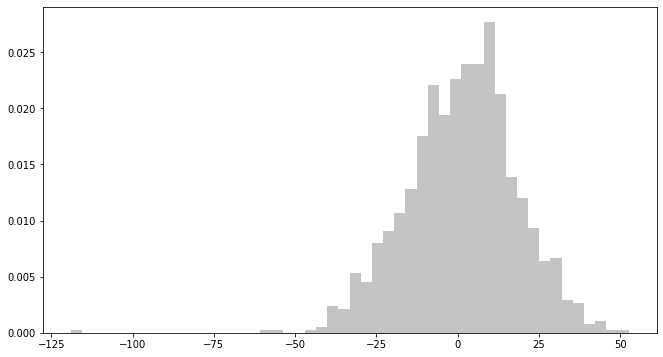

In [216]:
plt.figure(num=1, figsize=(11, 6))
# main figure
plt.hist(port_return.iloc[:,2], bins=50, density=True,color=grey, edgecolor='none')
plt.hold(True)
plt.axis("tight")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.xlabel("Daily Returns of optimal portfolio")
plt.ylabel("Normalised Return Distribution")
plt.show()

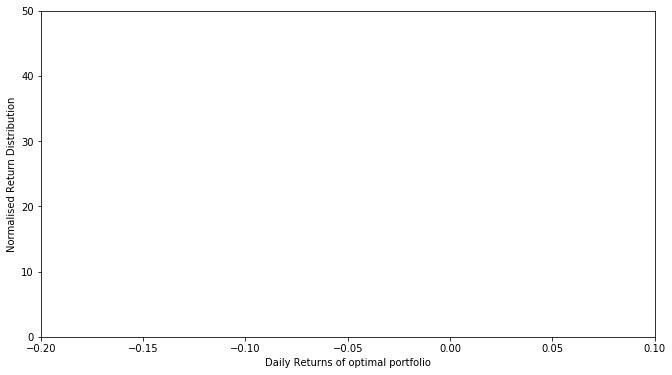

<Figure size 432x288 with 0 Axes>

In [218]:
plt.figure(num=1, figsize=(11, 6))
# main figure
plt.hist(port_return.iloc[:,2], bins=50, density=True,color=grey, edgecolor='none')
plt.axis("tight")
plt.xlim([-0.2, 0.1])
plt.ylim([0, 50])
plt.xlabel("Daily Returns of optimal portfolio")
plt.ylabel("Normalised Return Distribution")
plt.show()
plt.savefig('histogram.png')